In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint



In [5]:
def f(Y, t):
    y1, y2 = Y
    return [y2, -k*y1-b*y2+4*np.cos(2*t)]
k=10.
b=2



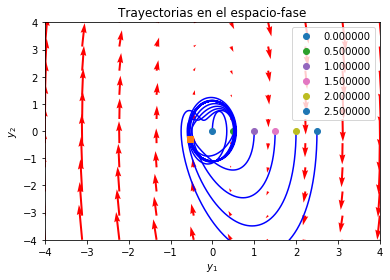

In [8]:
############Campo
y1 = np.linspace(-4.0, 4.0, 10)
y2 = np.linspace(-4.0, 4.0, 10)

Y1, Y2 = np.meshgrid(y1, y2)

t = 0.0005

u, v = np.zeros(Y1.shape), np.zeros(Y2.shape)

NI, NJ = Y1.shape

for i in range(NI):
    for j in range(NJ):
        x = Y1[i, j]
        y = Y2[i, j]
        yprime = f([x, y], t)
        u[i,j] = yprime[0]
        v[i,j] = yprime[1]
     

Q = plt.quiver(Y1, Y2, u, v, color='r')

#########Curvas

for y10 in [0, 0.5, 1, 1.5, 2, 2.5]:
    tspan = np.linspace(0, 30, 20000)
    y0 = [y10, 0]
    ys = odeint(f, y0, tspan)
    plt.plot(ys[:,0], ys[:,1], 'b-') # path
    plt.plot([ys[0,0]], [ys[0,1]], 'o',label='%f'%y10) # start
    plt.plot([ys[-1,0]], [ys[-1,1]], 's') # end
    

plt.xlim([-4, 4])
plt.xlabel('$y_1$')
plt.ylabel('$y_2$')
plt.xlim([-4, 4])
plt.ylim([-4, 4])
plt.title('Trayectorias en el espacio-fase')
plt.legend()



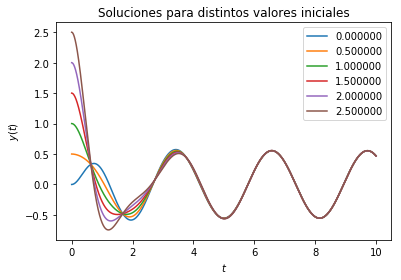

In [12]:
plt.figure()
for y10 in [0, 0.5, 1, 1.5, 2, 2.5]:
    tspan = np.linspace(0, 10, 20000)
    y0 = [y10, 0]
    ys = odeint(f, y0, tspan)
    plt.plot(tspan,ys[:,0],label='%f'%y10)
plt.xlabel('$t$')
plt.ylabel('$y(t)$')
plt.title('Soluciones para distintos valores iniciales')
plt.legend()
